In [26]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

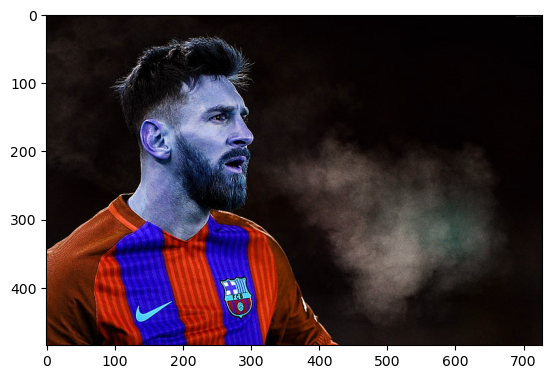

In [27]:
image=cv2.imread(r"C:\Users\Admin\CV\New folder\messi.jpg")
plt.imshow(image)

In [28]:
#Split the image in R,G,B  arrays
blue,green,red = cv2.split(image)

In [29]:
#initialize PCA with first 20 principal components
pca = PCA(2)

In [30]:
#Applying to red channel & inverse transform to transformed array
red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)

In [31]:
#Applying to green channel & inverse transform to transformed array
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)

In [32]:
#Applying to blue channel & inverse transform to transformed array
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)

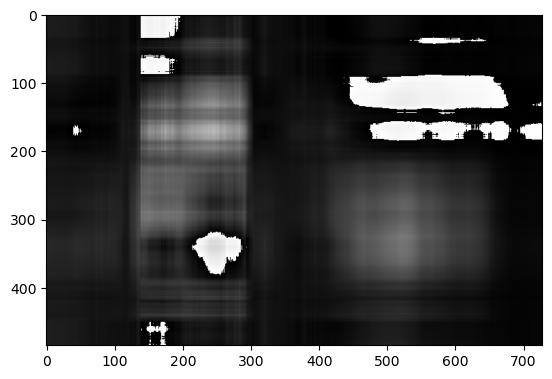

In [33]:
img_compressed = (np.dstack((green_inverted, green_inverted, green_inverted))).astype(np.uint8)
plt.imshow(img_compressed)

In [34]:
#singular value decomposition
import requests

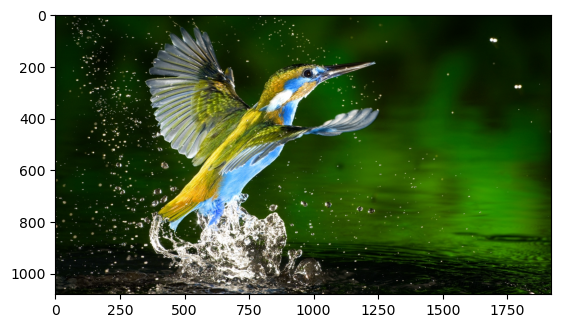

In [35]:
kf_image=cv2.imread(r"C:\Users\Admin\CV\New folder\kingfisher bird.jpg")
plt.imshow(kf_image)

In [36]:
#Converting to gray scale
gray_image = cv2.cvtColor(kf_image,cv2.COLOR_BGR2GRAY)

# Calculating the SVD
u, s, v = np.linalg.svd(gray_image)

In [37]:
#inspect shape of the matrices
print(f'u.shape:{u.shape},s.shape:{s.shape},v.shape:{v.shape}')

u.shape:(1080, 1080),s.shape:(1080,),v.shape:(1920, 1920)


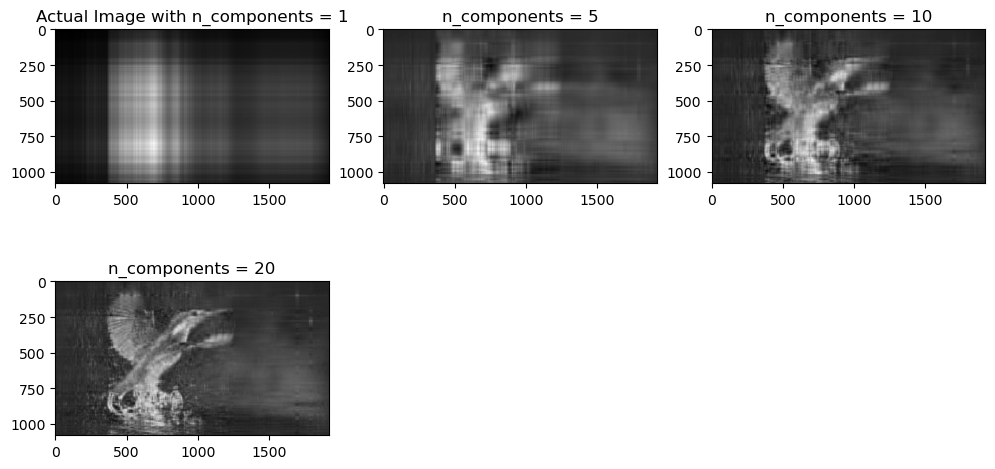

In [38]:
comps = [1,5,10,20]
plt.figure(figsize=(12,6))

for i in range(len(comps)):
    low_rank = u[:, :comps[i]] @ np.diag(s[:comps[i]]) @ v[:comps[i], :]
    
    if(i==0):
        plt.subplot(2,3, i+1),
        plt.imshow(low_rank, cmap='gray'),
        plt.title(f'Actual Image with n_components = {comps[i]}')
        
        
    else:
        plt.subplot(2,3, i+1),
        plt.imshow(low_rank, cmap='gray'),
        plt.title(f'n_components = {comps[i]}')

# NMF

In [39]:
from sklearn import decomposition 
t_image = cv2.imread(r"C:\Users\Admin\CV\New folder\Tyre 4k.webp")

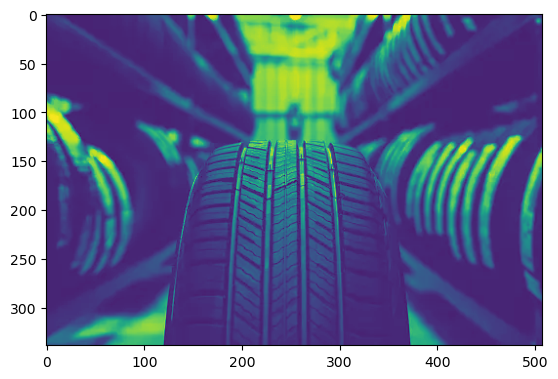

In [40]:
gray_image = cv2.cvtColor(t_image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)

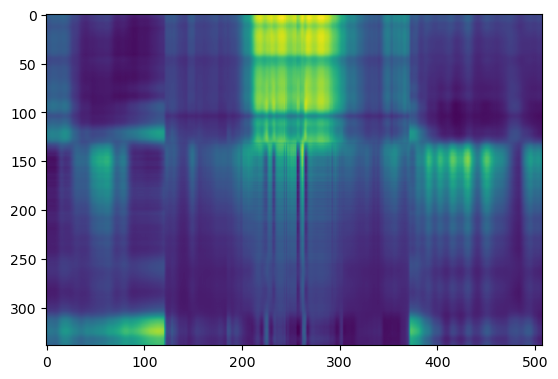

In [43]:
estimator = decomposition.NMF(n_components=3, init = 'random', tol = 5e-3)
w = estimator.fit_transform(gray_image)
h = estimator.components_
new_img = np.dot (w,h)
plt.imshow(new_img)
plt.show()